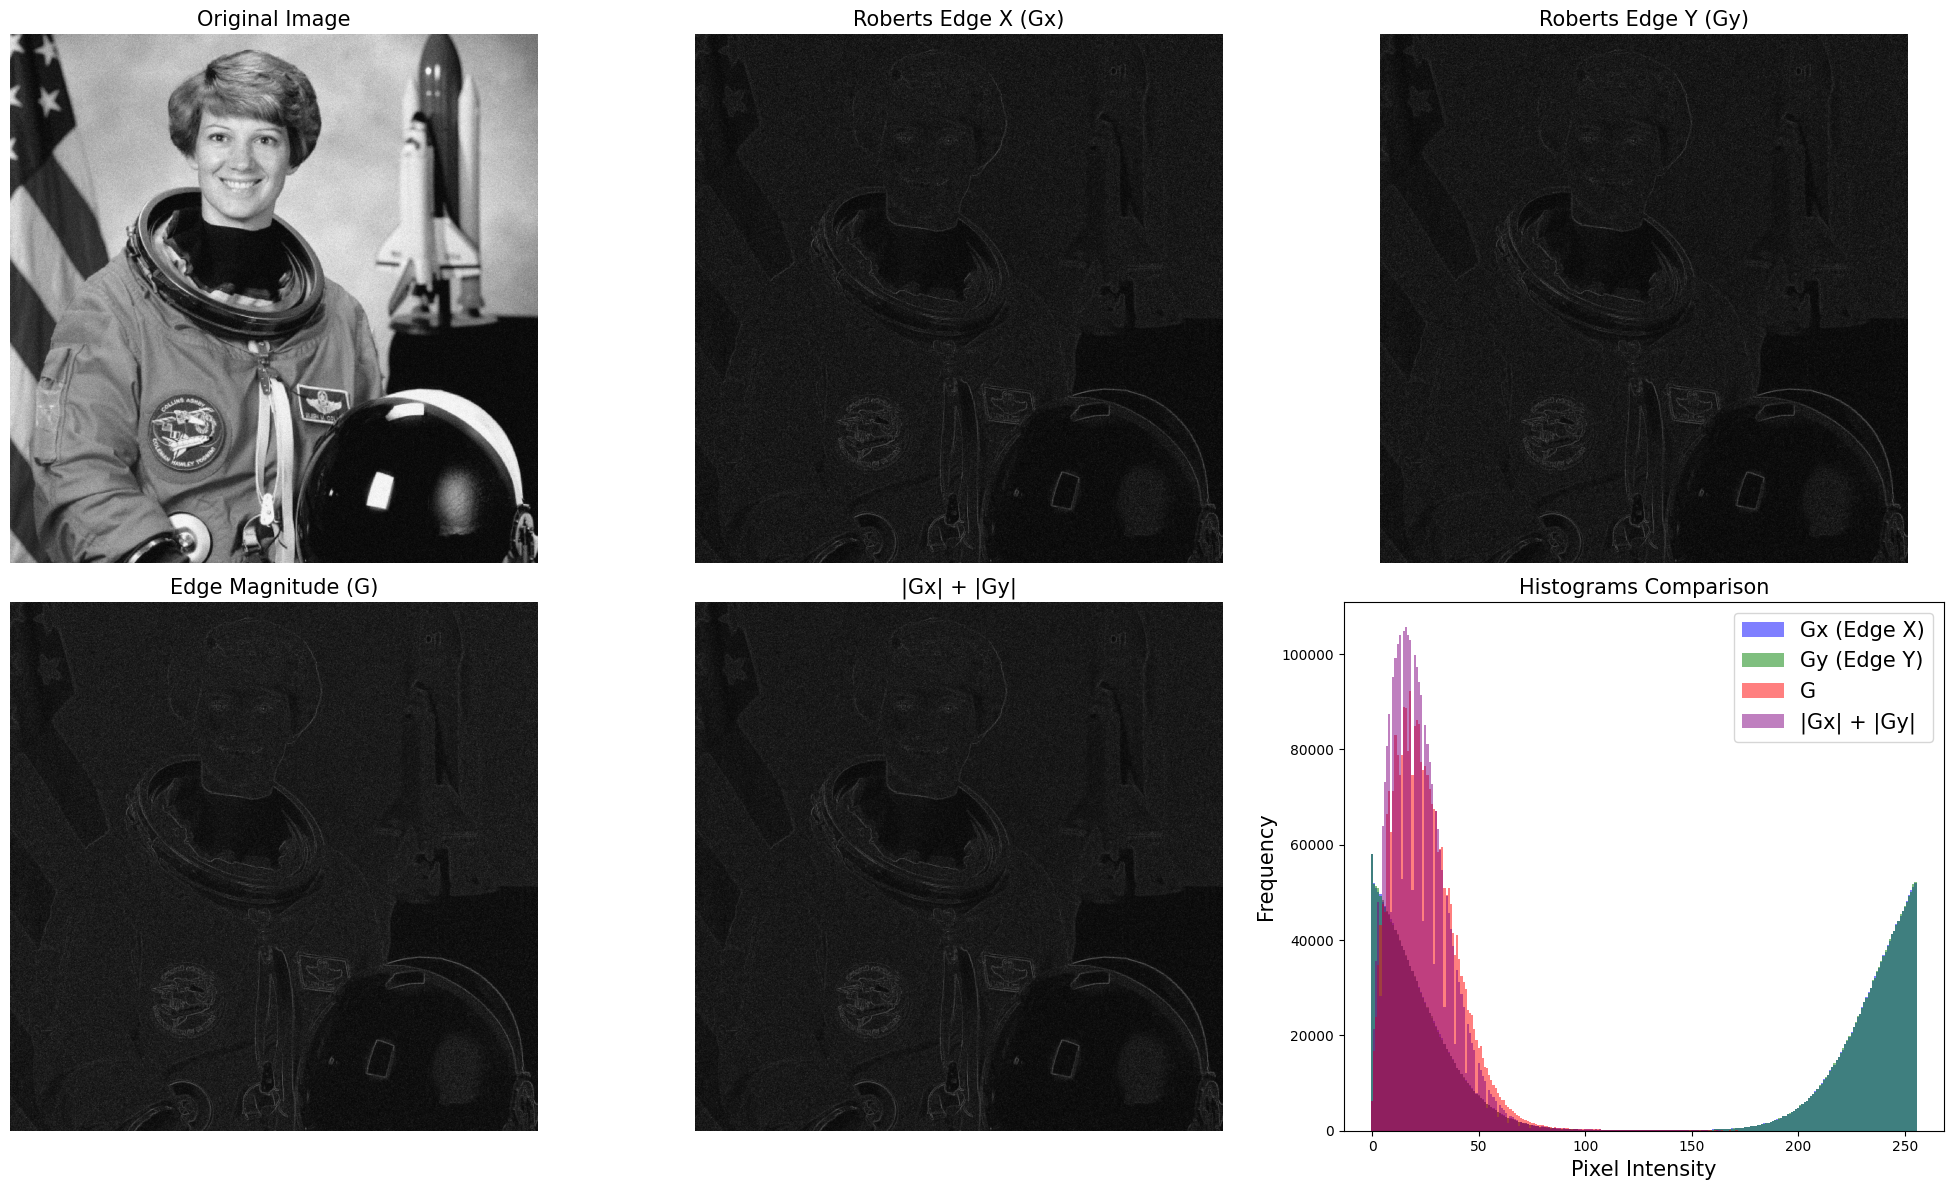

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (흑백 이미지로 변환)
image = cv2.imread('example.jpg', cv2.IMREAD_GRAYSCALE)

# 로버츠 마스크 정의
Gx = np.array([[1, 0],
               [0, -1]])  # x 방향

Gy = np.array([[0, 1],
               [-1, 0]])  # y 방향

# 마스크를 이용해 이미지 필터링 (convolution)
edge_x = cv2.filter2D(image, cv2.CV_64F, Gx)  # x 방향 에지
edge_y = cv2.filter2D(image, cv2.CV_64F, Gy)  # y 방향 에지

# 에지 크기 계산 (정확한 값)
edge_magnitude = np.sqrt(np.square(edge_x) + np.square(edge_y))
edge_magnitude = cv2.normalize(edge_magnitude, None, 0, 255, cv2.NORM_MINMAX)  # 정규화

# 에지 크기 근사값 계산 (|Gx| + |Gy|)
edge_approx = np.abs(edge_x) + np.abs(edge_y)
edge_approx = cv2.normalize(edge_approx, None, 0, 255, cv2.NORM_MINMAX)  # 정규화

# 히스토그램 계산
hist_x = cv2.calcHist([edge_x.astype('uint8')], [0], None, [256], [0, 256]).flatten()
hist_y = cv2.calcHist([edge_y.astype('uint8')], [0], None, [256], [0, 256]).flatten()
hist_magnitude = cv2.calcHist([edge_magnitude.astype('uint8')], [0], None, [256], [0, 256]).flatten()
hist_approx = cv2.calcHist([edge_approx.astype('uint8')], [0], None, [256], [0, 256]).flatten()

# 히스토그램을 비교할 x 축 (픽셀 강도)
bins = np.arange(256)

# 결과 출력 (2x3 플롯)
plt.figure(figsize=(20, 12))

fs = 15  # 폰트 크기 설정

# 첫 번째 줄: 원본 이미지, Gx, Gy
plt.subplot(2, 3, 1)
plt.title("Original Image", fontsize=fs)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title("Roberts Edge X (Gx)", fontsize=fs)
plt.imshow(np.abs(edge_x), cmap='gray')  # 절댓값으로 표시
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title("Roberts Edge Y (Gy)", fontsize=fs)
plt.imshow(np.abs(edge_y), cmap='gray')
plt.axis('off')

# 두 번째 줄: Edge Magnitude, Approximation, Histogram (Bar Chart)
plt.subplot(2, 3, 4)
plt.title("Edge Magnitude (G)", fontsize=fs)
plt.imshow(edge_magnitude, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title("|Gx| + |Gy|", fontsize=fs)
plt.imshow(edge_approx, cmap='gray')
plt.axis('off')

# 히스토그램 바 차트
plt.subplot(2, 3, 6)
plt.title("Histograms Comparison", fontsize=fs)
plt.bar(bins, hist_x, width=1, color='blue', alpha=0.5, label="Gx (Edge X)")
plt.bar(bins, hist_y, width=1, color='green', alpha=0.5, label="Gy (Edge Y)")
plt.bar(bins, hist_magnitude, width=1, color='red', alpha=0.5, label="G")
plt.bar(bins, hist_approx, width=1, color='purple', alpha=0.5, label="|Gx| + |Gy|")
plt.legend(fontsize=fs)
plt.xlabel("Pixel Intensity", fontsize=fs)
plt.ylabel("Frequency", fontsize=fs)

# 레이아웃 조정
plt.tight_layout()
plt.show()